![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Zombie apocalypse: Save Vancouver’s art 

It’s the year 2070. The zombie apocalypse hit Vancouver and you’re one of a few survivors.
Before the apocalypse hit, you worked at the City of Vancouver. You still have a working computer, and access to the data sets about the city’s art. 


### You mission:

* Save specific pieces of artwork around the city.
* Find specific pieces of art to get hidden emergency supplies (because you worked at the City, you know about these locations).


#### Pictures of art are in this dataset. 

For example: 
https://opendata.vancouver.ca/explore/dataset/public-art/files/459ba5fac0d556ef44f2ab41d967f42f/download/ 

https://opendata.vancouver.ca/explore/dataset/public-art/files/2bc58382765bbc195272f0274bf77eac/download/ 



## Downloading the data into a 'dataframe'

We begin by downloading the data directly from the website. 

From the [Vancouver Open Data Website, Public Art Dataset](https://opendata.vancouver.ca/explore/dataset/public-art/information/?rows=500&location=11,49.28706,-123.09993), we select the "API" tab, change the number of datapoints and the art metadata, scroll down and then copy and paste the URL. 

We will work with 500 datapoints in this notebook. 

Let's start by importing and installing all necessary requirements. 

Press the >|Run button to run the next few cells. 

In [ ]:
!pip install folium --upgrade

We need the [Python module "folium"](https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/) to create interactive maps. 

The cell above lets us install it. The cell below will let us "import" it - this means we can use any functions and commands associated to these [Pythod modules](https://docs.python.org/3/tutorial/modules.html). 

In [ ]:
# Import libraries or modules that we will need

# We will need to get the data from the API 
import requests as r
# We will store the data into a 'dataframe' using pandas
import pandas as pd
# Need to remove this if we upgrade to pandas 1.0.1 
from pandas.io.json import json_normalize
# We want to be as precise as possible in keeping tree coordinates
from decimal import *
# We will visualize the coordinates in a map using the folium
#!pip install folium
import folium
# We want to cluster them using the MarkerCluster submodule from folium plugins
from folium.plugins import MarkerCluster

print("Importing Python libraries was successful!")

In [ ]:
# Setting preview options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# Download data from API 
link = "https://opendata.vancouver.ca/api/records/1.0/search/?dataset=public-art&rows=500&facet=type&facet=status&facet=sitename&facet=siteaddress&facet=primarymaterial&facet=ownership&facet=neighbourhood&facet=artists&facet=photocredits"
API_response_trees = r.get(link)
data = API_response_trees.json() # Check the JSON Response Content documentation below

In [ ]:
records = json_normalize(data=data['records'])

---
### 📗 Challenge 1

Look at the table above. Use the .head() method to look at the first few rows.

---

In [ ]:
# ✏️ your code here
records

### What are the field names you see? What do they tell you about the data?
Double click this cell to enter your observations. 

## Data Cleaning

The table contains an ID uniquely identifying each piece of art, along with details on its location, type and address.

There are many columns which have data which we may not necessarily use. 

One column we will use is `fields.geom.coordinates` - which contains latitude and longitue coordinates locating the art. 

---
### 📗 Challenge 2

1. Run the code below to see what is under the `fields.geom.coordinates`.


In [ ]:
records["fields.geom.coordinates"]

2. Run the cell below to split the coordinates into a latitude and a longitude. 

---

In [ ]:
lon = []
lat = []
for item in records['fields.geom.coordinates'].to_list():
    if type(item) !=float:
        lon.append(item[0])
        lat.append(item[1])
    else:
        lon.append(0)
        lat.append(0)

3. Run the cell below to create the new columns.

---

In [ ]:
records['longitude'] = lon
records['latitude'] = lat


4. Run the cell to see the new data.

---

In [ ]:
records.head()

## Data Visualization

Now that we have cleaned up the dataframe and separated the string `location` values into separate numerical values containing the `latitude` and `longitude` coordinates, we will use the Python library called `folium` to visualize our data geographically.

---
### 📗Challenge 3 

1. Look up the coordinates for the BC Lower Mainland
2. In the cell below, enter the North coordinate (latitude) and the West coordinate (longitude) into separate variables (we have created the variable names for you). Make sure you enter numbers only, no letters!
3. These will be the initial coordinates that will help us locate our map. 
4. Run the cell to display the map. Ensure you are in the right location (hint: Vancouver should appear in the map)
---

In [ ]:
# ✏️ Your code here 
latitude =  
# ✏️ Your code here 
longitude = 

# Initial coordinates 
SC_COORDINATES = [latitude, longitude]

# Create a map using our initial coordinates
map_osm=folium.Map(location=SC_COORDINATES, zoom_start=10, tiles='Stamen Terrain')

# Display the map 
display(map_osm)

## Displaying Public art locations

We can now add the art locations into our map. 

In the cell below we will [iterate](https://www.merriam-webster.com/dictionary/iteration) over each record in our dataframe `records`. 

We will then add markers (one marker for each pair of coordinates) using the `folium.Marker` function. 

We will pass the `latitude` and `longitude` coordinates using the `location` parameter, and mark each tree with its `fields.url` using the `popup` parameter. 

We will add this to our `marker_cluster` on our map called `map_osm`. 

Run the cell below to see the locations of the trees.

In [ ]:
# Create marker cluster and add to our map
marker_cluster = MarkerCluster().add_to(map_osm)

# Iterate over each record, and add tree x and y coordinates, as well as tree name
MAX_RECORDS = len(records)
# For each record in rawData
for each in records[0:MAX_RECORDS].iterrows():
    # Use folium.Marker function, use X and Y coordinates to specify location
    folium.Marker(location = [each[1]['latitude'],each[1]['longitude']], 
                  # Add tree name
                  popup=folium.Popup(each[1]['fields.url'],sticky=True),
                  
                  #Make color/style changes here
                  icon=folium.Icon(color='green', icon='fa-tint', prefix='fa'),
                  # Make sure our trees cluster nicely!
                  clustered_marker = True).add_to(marker_cluster)

# Show the map
display(map_osm)

# Optional - you can save this map as an HTML file
#map_osm.save('TreeMap.html')

---
### 📗 Challenge 4

Use the interactive map above for this exercise. You will see 'clusters' of pieces of art. 

Clusters with over 100 art pieces will be coloured in red, clusters with fewer than 100 art pieces will be coloured in yellow, while clusters with fewer than 10 art pieces will be coloured in green. A single art piece has a green colour . 

1. Click on the largest cluster. It will break into smaller clusters. 
2. How many red clusters do you see? How many yellow clusters? and green ones? 
3. Pick a yellow cluster and click on it. Are the clusters evenly distributed? If no, where are the clusters concentrated? 
4. Click on any of the icons with a <i class="fa fa-tint" aria-hidden="true"></i> symbol in it. You will see a URL. 
#### Your answers and observations here:

---

### 📗 Challenge 5

Each <i class="fa fa-tint" aria-hidden="true"></i>  icon represents a piece of public art. 

![](Art.png)

Clicking an icon can get you more information about it by visiting the URL in it.

Click on three different icons, copy and paste the URLS into a new window and answer the following questions:

1. URL 1 you picked
2. Name of piece of art
3. Name of artist(s)
4. Where is it
5. Why did you pick it, i.e. what did you like about it, how do you think it will help you in the zombie apocalypse

_______

1. URL 2 you picked
2. Name of piece of art
3. Name of artist(s)
4. Where is it
5. Why did you pick it, i.e. what did you like about it, how do you think it will help you in the zombie apocalypse
________

1. URL 3 you picked
2. Name of piece of art
3. Name of artist(s)
4. Where is it
5. Why did you pick it, i.e. what did you like about it, how do you think it will help you in the zombie apocalypse

### 📗 Challenge 6


1. Find the “Sacredness of Four” sculpture. You’ll find the tools you need to remove the emergency supplies stored in art around Vancouver. 

2. Find a mural with three blue birds. This has the secret location of three underground safe houses. 
3. Find the statue where the City of Vancouver stored the “keys of the city”, which lead to a food storehouse. HINT: this is a statue of a historical figure and who played a role in Vancouver’s history. 


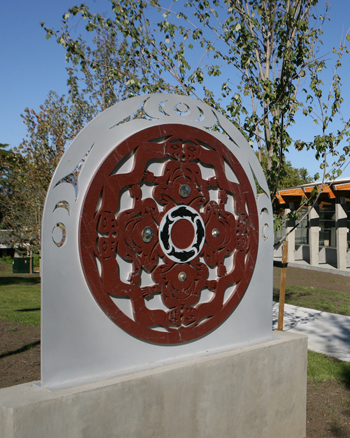


✏️ Double click this cell and write down here the URL associated to your challenge. 

## Further Visualization and Statistics

A natural question to ask is what is the most common kind of art type. To find out, we'll group and plot the data.

We start by setting up our visualizing environment. 

In [ ]:
#load "cufflinks" library under short name "cf"
import cufflinks as cf

#command to display graphics correctly in Jupyter notebook
cf.go_offline()

def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)
    
get_ipython().events.register('pre_run_cell', enable_plotly_in_cell)

### Most commonly used art material

First we'll group data by `name` using the `groupby()` method. 

Then we'll use the `size()` method to count how many trees of each kind there are. 

Next we'll sort the data. 

Run the cell below to perform these steps and show the five most kinds of primary material used in Vancouver Public art.

In [ ]:
# This cell groups trees by name, and counts them
count_art_by_material = records.groupby("fields.primarymaterial").size().reset_index(name="count")
# once it does that, it sorts the counts in descending order
ordered_count = count_art_by_material.sort_values(by='count', ascending=False)
# And displays the first 5 results. 
ordered_count.head(10)

You can see the most common art material in Vancouver Public Art. Let's visualize these data in a pie chart.

In [ ]:
ordered_count.iloc[0:10].iplot(kind="pie",values="count",labels="fields.primarymaterial",\
                              title="Primary material") 

### How old is the art?

We will follow a similar code structure as before. 
Run the cell below.

In [ ]:
# This cell groups trees by name, and counts them
count_art_by_year= records.groupby("fields.yearofinstallation").size().reset_index(name="count")
# once it does that, it sorts the counts in descending order
ordered_count_y = count_art_by_year.sort_values(by='count', ascending=False)
# And displays the first 15 results. 
ordered_count_y.head(15)

Create a pie chart using the `ordered_count_y` dataframe. 


In [ ]:
# ✏️ your code here


---
### 📗 Challenge 7

1. Hover over the plots.
2. What is the percentage associated to each of the 10 most common material used? 
3. What is the most common type of material? 
4. Why do you think that is? 
5. When was most art installed?

#### Your answers and observations here

---

# Conclusions





## Reflections

Write about some or all of the following questions, either individually in separate markdown cells or as a group.
- What is something you learned through this process?
- How well did your group work together? Why do you think that is?
- What were some of the hardest parts?
- What are you proud of? What would you like to show others?
- Are you curious about anything else related to this? Did anything surprise you?
- How can you apply your learning to future activities?

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)